<a href="https://colab.research.google.com/github/deepu718/tensorflow_practice/blob/main/03_multi_class_image_classifiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi- class Image classification

We've just been through a bunch of following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
5. Repeat until satisfied



## 1. Import and become one with the data

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2023-07-22 18:18:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.69.128, 64.233.182.128, 64.233.183.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   223MB/s    in 2.2s    

2023-07-22 18:18:11 (223 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

# walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 2 directories and 0 images in '10_food_classes_all_data'.
there are 10 directories and 0 images in '10_food_classes_all_data/train'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
there are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.

In [3]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [4]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  # setup the target directory where you will get your image from
  target_folder = target_dir+target_class

  # get the random imaage path
  random_image = random.sample(os.listdir(target_folder),1)

  # read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"image shape: {img.shape}")

  return img



image shape: (512, 512, 3)


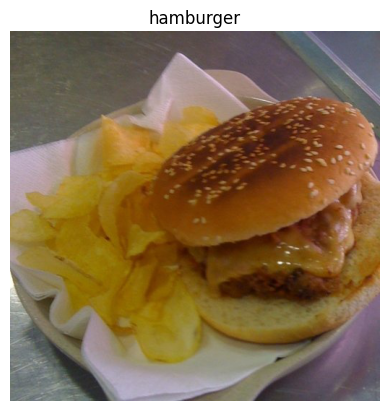

In [17]:
# Visualize

img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))